# Linear Regression Example

In [50]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import scipy


from sklearn.linear_model import LinearRegression

# Reading data from file location
df = pd.read_csv('C:/Users/dlouie3/Desktop/Summer_2018-PTWS-master/parsed_data_youtube.csv')

# display the head (first five rows) from the data.
df.head() 

,unix_time,response_time,Years,Days,Hours,Minutes,Seconds,Milliseconds
0,1.527786e+09,1,48,150,16,53,6,153
1,1.527786e+09,1,48,150,16,53,7,167
2,1.527786e+09,1,48,150,16,53,8,183
3,1.527786e+09,1,48,150,16,53,9,187
4,1.527786e+09,1,48,150,16,53,10,201


In [27]:
# LinearRegression will expect an array of shape (n, 1) for the "Training data"
X = df['unix_time'].values[:,np.newaxis]

# "Target data" is array of shape (n,)
y = df['response_time'].values

# Setting the Linear Regression model to a variable and fitting the data
lr_model = LinearRegression()
lr_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

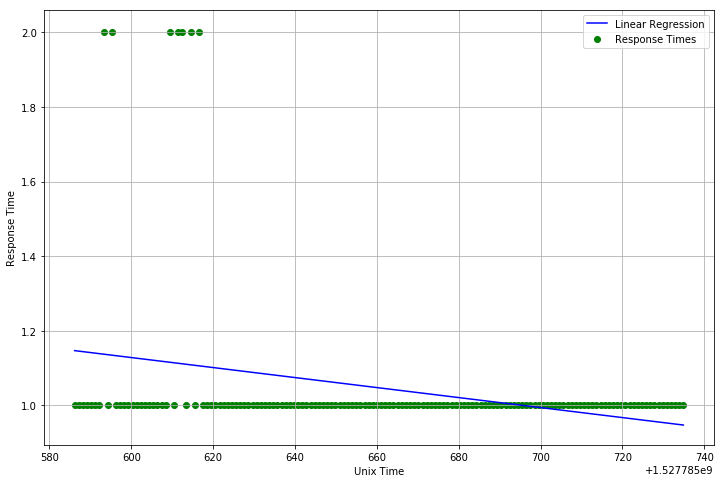

In [52]:
# Increasing the Size of the figure length by height in inches
plt.figure(figsize=(12,8))

# ploting the points into the scatter plot
plt.scatter(X, y,color='g', label='Response Times')
# ploting the best line of fit for the scatter plot
plt.plot(X, lr_model.predict(X), color='blue', label='Linear Regression')

# Labeling the x and y axis
plt.xlabel('Unix Time')
plt.ylabel('Response Time')

plt.legend()

# Displaying the grid in the graph
plt.grid(True)

# displaying the plot graph
plt.show()

In [39]:
feature_cols = ['unix_time', 'Years', 'Days', 'Hours', 'Minutes', 'Seconds', 'Milliseconds']
X2 = df[feature_cols]

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.4, random_state = 2)

lr_model2 = LinearRegression()
lr_model2.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
from sklearn.metrics import accuracy_score
y_predict = lr_model2.predict(X_test)
accuracy = accuracy_score(y_test, y_predict.round())

print('Linear Regression Accuracy: '+ str(accuracy))

Linear Regression Accuracy: 0.9333333333333333


# Example of a 3D Scatterplot

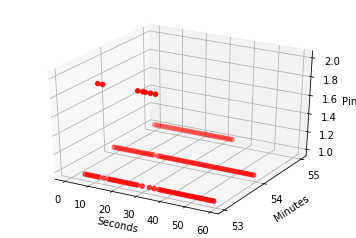

In [44]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_yticks(scipy.arange(X2['Minutes'].min(), X2['Minutes'].max()+1,1))

a = X2['Seconds']
b = X2['Minutes']
d = y

ax.scatter(a, b, d, c='r', marker='o')


ax.set_xlabel('Seconds')
ax.set_ylabel('Minutes')
ax.set_zlabel('Ping')



plt.show()